#Implementation of RNN in Python

                                                   By
                                                          Amal R
                                                          Kiran Joy
                                                          Sangeeth G





# RNN
A recurrent neural network, also known as RNN, is a special type of an artificial neural network that allows
persisting information based on past knowledge by using a special type of looped architecture. They are used a
lot in areas related to data with sequences like predicting the next word of a sentence. These looped networks
are called recurrent because they perform the same operations and computation for each and every element
in a sequence of input data. RNNs have memory that helps in capturing information from past sequences.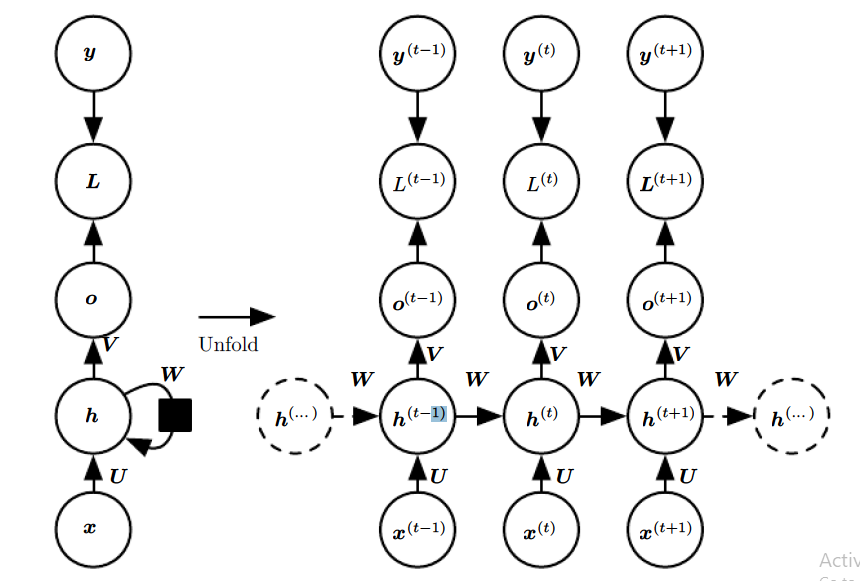


#Applications
RNNs are widely used in the following domains/ applications:

*  Prediction problems
>Stock prediction is one of the purest representations of RNN applications by taking into account of the historical data.
*  Language Modelling and Generating Text
>Taking a sequence of words as input, we try to predict the possibility of the next word.
*  Machine Translation
>The input can be the source language and the output will be in the target language which the user wants.
*  Speech Recognition
>RNNs can be used for predicting phonetic segments considering sound waves from a medium as an input source. The set of inputs consists of phoneme or acoustic signals from an audio which are processed in a proper manner and taken as inputs.
*  Generating Image Descriptions
>A combination of CNNs and RNNs are used to provide a description of what exactly is happening inside an image. CNN does the segmentation part and RNN then uses the segmented data to recreate the description. 
*  Video Tagging
>RNNs can be used for video search where we can do image description of a video divided into numerous frames.
*  Call Center Analysis
>This can be considered as one of the major applications of RNNs in the field of audio processing. Customer metrics are measured on the output of the call rather than the call itself. However, analysing the call itself will provide businesses with the solutions to why the support staff succeeded and what were the steps taken in resolving their customer issue.
*  Visual search, Face detection, OCR Applications as Image Recognition
>Humans tend to think visually and have an extensive visual shorthand reference board that helps them to navigate in the world. In the fields of search engines, ecommerce and OCR apps this feature is considered for satisfying of the customer needs.
*  Other applications like Music composition





# Packages used
Packages used are math module to generate cosine function. Numpy module is used throught the program in data preparation, building RNN and training the model. Finally matplotlib is used to plot the mathematical function

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Generation of input dataset
First we create cosine wave like data using the math module. The data is then plotted using matplotlib.

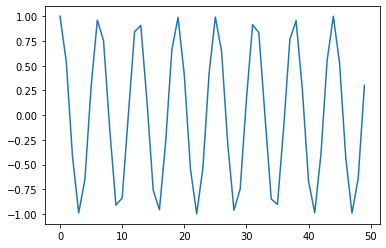

In [ ]:
cos_wave = np.array([math.cos(x) for x in np.arange(200)])
plt.plot(cos_wave[:50])

# Data preparation
 A sequence of 50 numbers belonging to a cosine wave data is created. The cosine graph is converted two numpy arrays X and Y. These arrays represent x and y coordinates of all the data points of created cosine wave. Model we are gonna create is going to accept a single sequence of length 50 as input.

In [ ]:
X = []
Y = []

seq_len = 50
num_records = len(cos_wave) - seq_len

for i in range(num_records - 50):
    X.append(cos_wave[i:i+seq_len])
    Y.append(cos_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

Shape of the data is

In [ ]:
X.shape, Y.shape

((100, 50, 1), (100, 1))

# Validation data
Earlier when we prepared date we looped for (num_records-50) times. The reason we subtracted 50 from it is to use that 50 records as validation data. Validation data is created by following the steps as before. But here loop is for last 50 records of the cosine wave data created.

In [ ]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(cos_wave[i:i+seq_len])
    Y_val.append(cos_wave[i+seq_len])
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

# Create the Architecture for our RNN model
We move on to create the RNN model.The first step is to definie all the necessary variables and functions we’ll use in the RNN model. Our model will take in the input sequence, process it through a hidden layer of 100 units, and produce a single valued output. The learning rate is taken the default value 0f 0.0001.The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset is represented in the variable nepoch , which is set to a value of 25. The variabe T holds the length of the input sequence.

In [ ]:
learning_rate = 0.0001    
nepoch = 25               
T = 50                   
hidden_dim = 100         
output_dim = 1

bptt_truncate = 5
min_clip_value = -10
max_clip_value = 10

Next we define the weights of network
1. U is the weight matrix for weights between input and hidden layers
2. V is the weight matrix for weights between hidden and output layers
3. W is the weight matrix for shared weights in the RNN layer (hidden layer)

In [ ]:
U = np.random.uniform(0, 1, (hidden_dim, T))
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))
V = np.random.uniform(0, 1, (output_dim, hidden_dim))

# Activation function.
Next up we define activation function.In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. We define the sigmoid function for activation function

**Activation=1/(1+e^-x)**

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Train the model
Next step is to train the data on our sequence data. Steps in training data can be divided into following steps.


*   Check the loss on training data
* Forward pass
* Calculate Error
* Check the loss on validation data
*Forward Pass
* Calculate Error
*Start actual training
*Forward Pass
*Backpropagate Error
*Update weights


# Check the loss on training and validation data
The first step is to calculate the loss on training and validation data. We run the loop in the range of the value of nepoch. Inside the loop we first calculate the loss on training set. The variable loss initalized to zero holds the value of loss in training data. We do forward pass through the designed RNN model. In the forward pass , weights U,V and W along with sigmoid function is used to unfold through the sequence. The value of mulv is used to calculate the loss. We do the same for validation data. With variable val_loss holding the value of loss on validation set. In each iteration the epoch number, loss and val_loss are printed.

In [ ]:
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0
    
    # do a forward pass to get prediction
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error 
        loss_per_record = (y - mulv)**2 / 2
        loss += loss_per_record
    loss = loss / float(y.shape[0])
 # check loss on val
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

        loss_per_record = (y - mulv)**2 / 2
        val_loss += loss_per_record
    val_loss = val_loss / float(y.shape[0])

    print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)
 

# Start actual training
We will now start with the actual training of the network. In this, we will first do a forward pass to calculate the errors and a backward pass to calculate the gradients and update them. All the training steps are done inside the loop ranging from number of epochs.

# Forward Pass
In the forward pass:

* We first multiply the input with the weights between input and hidden layers
* Add this with the multiplication of weights in the RNN layer. This is because we want to capture the knowledge of the previous timestep
*Pass it through a sigmoid activation function
*Multiply this with the weights between hidden and output layers
*At the output layer, we have a linear activation of the values so we do not explicitly pass the value through an activation layer
*Save the state at the current layer and also the state at the previous timestep in a list

The list layers hold all the current and previous state of all the layers. The mathematical operation similar to the forward pass we did it calculate the loss.But here we save the states of the layers.

In [ ]:
   
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]
    
        layers = []
        prev_s = np.zeros((hidden_dim, 1))
        dU = np.zeros(U.shape)
        dV = np.zeros(V.shape)
        dW = np.zeros(W.shape)
        
        dU_t = np.zeros(U.shape)
        dV_t = np.zeros(V.shape)
        dW_t = np.zeros(W.shape)
        
        dU_i = np.zeros(U.shape)
        dW_i = np.zeros(W.shape)
        
        # forward pass
       for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            layers.append({'s':s, 'prev_s':prev_s})
            prev_s = s
  

# Backpropagate Error
After the forward propagation step, we calculate the gradients at each layer, and backpropagate the errors. We will use truncated back propagation through time (TBPTT).

The backpropagation step is done for all the time steps in the RNN layer. So if our sequence length is 50, we will backpropagate for all the timesteps previous to the current timestep.

We backpropagate till x timesteps to save computational power. Consider this ideologically similar to stochastic gradient descent, where we include a batch of data points instead of all the data points.

The derivative of prediction is calculated using backpass. We run a loop in range of sequence length. We calculate change in mulv by substracting y from it.This value is used and multilped with transpose of the saved state of layers.In the end we calculate change in the state. 

In [ ]:
  # derivative of pred
        dmulv = (mulv - y)
        
        # backward pass
        for t in range(T):
            dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
            dsv = np.dot(np.transpose(V), dmulv)
            
            ds = dsv
            dadd = add * (1 - add) * ds
            
            dmulw = dadd * np.ones_like(mulw)

            dprev_s = np.dot(np.transpose(W), dmulw)


            for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
                ds = dsv + dprev_s
                dadd = add * (1 - add) * ds

                dmulw = dadd * np.ones_like(mulw)
                dmulu = dadd * np.ones_like(mulu)

                dW_i = np.dot(W, layers[t]['prev_s'])
                dprev_s = np.dot(np.transpose(W), dmulw)

                new_input = np.zeros(x.shape)
                new_input[t] = x[t]
                dU_i = np.dot(U, new_input)
                dx = np.dot(np.transpose(U), dmulu)

                dU_t += dU_i
                dW_t += dW_i
                
            dV += dV_t
            dU += dU_t
            dW += dW_t
            

# Update weights
Lastly, we update the weights with the gradients of weights calculated. One thing we have to keep in mind that the gradients tend to explode if you don’t keep them in check.This is a fundamental issue in training neural networks, called the exploding gradient problem. So we have to clamp them in a range so that they dont explode.

We calculate dU,dV and dW.By comparing the maximum and minimum of them with max clip value and min clip value we earlier assumed

In [ ]:
            if dU.max() > max_clip_value:
                
                dU[dU > max_clip_value] = max_clip_value
            if dV.max() > max_clip_value:
                dV[dV > max_clip_value] = max_clip_value
            if dW.max() > max_clip_value:
                dW[dW > max_clip_value] = max_clip_value
                
            
            if dU.min() < min_clip_value:
                dU[dU < min_clip_value] = min_clip_value
            if dV.min() < min_clip_value:
                dV[dV < min_clip_value] = min_clip_value
            if dW.min() < min_clip_value:
                dW[dW < min_clip_value] = min_clip_value
        
        # update
        U -= learning_rate * dU
        V -= learning_rate * dV
        W -= learning_rate * dW
        

Epoch:  1 , Loss:  [[111164.34465847]] , Val Loss:  [[55580.31399016]]
Epoch:  2 , Loss:  [[69017.88843702]] , Val Loss:  [[34507.4716535]]
Epoch:  3 , Loss:  [[36871.43221528]] , Val Loss:  [[18434.62931669]]
Epoch:  4 , Loss:  [[14724.97267272]] , Val Loss:  [[7361.78531717]]
Epoch:  5 , Loss:  [[2556.884353]] , Val Loss:  [[1278.11320308]]
Epoch:  6 , Loss:  [[16.53030383]] , Val Loss:  [[8.24061097]]
Epoch:  7 , Loss:  [[18.04287716]] , Val Loss:  [[8.98846438]]
Epoch:  8 , Loss:  [[18.19638759]] , Val Loss:  [[9.06802717]]
Epoch:  9 , Loss:  [[18.43568884]] , Val Loss:  [[9.18501655]]
Epoch:  10 , Loss:  [[19.07228573]] , Val Loss:  [[9.49824462]]
Epoch:  11 , Loss:  [[18.47269697]] , Val Loss:  [[9.20406087]]
Epoch:  12 , Loss:  [[18.70366493]] , Val Loss:  [[9.31547672]]
Epoch:  13 , Loss:  [[18.42751881]] , Val Loss:  [[9.18455173]]
Epoch:  14 , Loss:  [[18.39238648]] , Val Loss:  [[9.16769709]]
Epoch:  15 , Loss:  [[18.56640692]] , Val Loss:  [[9.24953415]]
Epoch:  16 , Loss: 

Training process..

# Get predictions
We will do a forward pass through the trained weights to get our predictions:
The values are stored in the list preds. It is then converted to an array using numpy
Then we plot both actual output expected (in red color) and predicted output(in green) using matplotlib

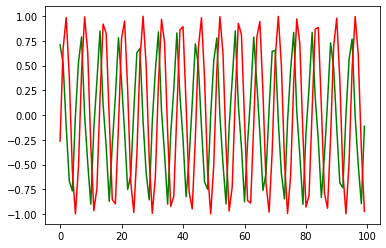

In [ ]:
        
preds = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)
plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y[:, 0], 'r')
plt.show()


Next we plot on the validation set

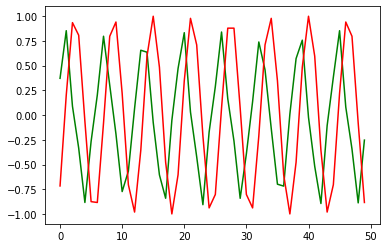

In [ ]:
preds = []
for i in range(Y_val.shape[0]):
    x, y = X_val[i], Y_val[i]
    prev_s = np.zeros((hidden_dim, 1))
    # For each time step...
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)

plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y_val[:, 0], 'r')
plt.show()

This the output we got